In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from pathlib import Path

#  Import and read the cardio_train.csv.
import pandas as pd
file_path = Path("./sample_data/cardio_train.csv")
cardio_df = pd.read_csv(file_path, sep = ';')
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# Determine the number of unique values in each column.
cardio_df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [5]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = cardio_df['cardio']

# Separate the X variable, the features
X = cardio_df.drop(columns=['cardio'])

In [6]:
# Review the y variable Series
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [7]:
# Review the X variable DataFrame
X.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0


In [8]:
# Check the balance of the labels set variable (y)
y.value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [9]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression (random_state=1)

# Fit the model using training data
log_reg_model= logistic_regression_model.fit(X_train, y_train)

In [11]:
# Make a prediction using the testing data
test_predictions = logistic_regression_model.predict(X_test)
pd.DataFrame({'Predictions': test_predictions, 'Actual': y_test})

,Predictions,Actual
6670,1,1
49567,0,1
50796,1,1
22310,1,1
54037,1,1
...,...,...
32138,1,1
53648,1,1
64554,1,1
33812,1,1


In [12]:
# Generate a confusion matrix for the model
confusion_matrix_test = confusion_matrix(y_test, test_predictions)
confusion_matrix_test

array([[6358, 2251],
       [3054, 5837]])

In [13]:
# Print the classification report for the model
test_report = classification_report(y_test, test_predictions)
print(test_report)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      8609
           1       0.72      0.66      0.69      8891

    accuracy                           0.70     17500
   macro avg       0.70      0.70      0.70     17500
weighted avg       0.70      0.70      0.70     17500



In [14]:
cardio_df.loc[cardio_df['gender'] == 1, 'gender'] = 'women'
cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,women,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,women,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,women,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,women,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,women,163,72.0,135,80,1,2,0,0,0,1


In [15]:
cardio_df.loc[cardio_df['gender'] == 2, 'gender'] = 'men'
cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,men,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,women,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,women,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,men,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,women,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,men,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,women,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,men,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,women,163,72.0,135,80,1,2,0,0,0,1


([<matplotlib.patches.Wedge at 0x7d6d8a417370>,
 [Text(-1.0684733211812665, -0.5462277564568412, 'women'),
  Text(0.9794338308697512, 0.5007088684533197, 'men')],
 [Text(-0.6232761040224054, -0.3186328579331573, '65.0%'),
  Text(0.5342366350198642, 0.27311392824726527, '35.0%')])

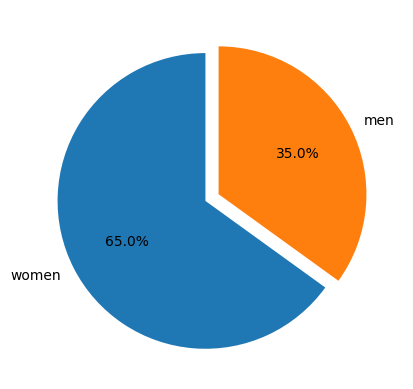

In [16]:
plt.pie(cardio_df['gender'].value_counts(),labels=['women','men'], startangle=90,
autopct='%.1f%%', explode=[0.1, 0])

<Axes: xlabel='cardio'>

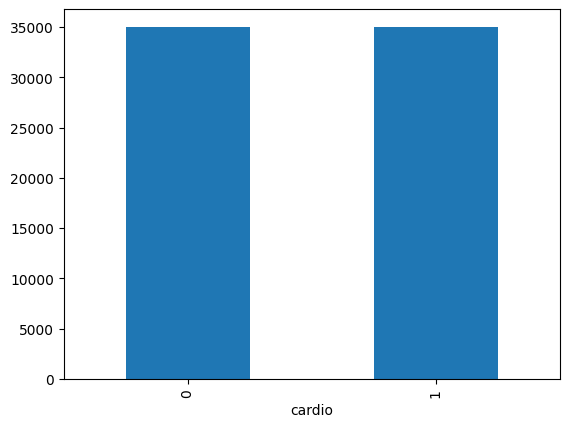

In [17]:
#
cardio_df["cardio"].value_counts().plot(kind='bar')

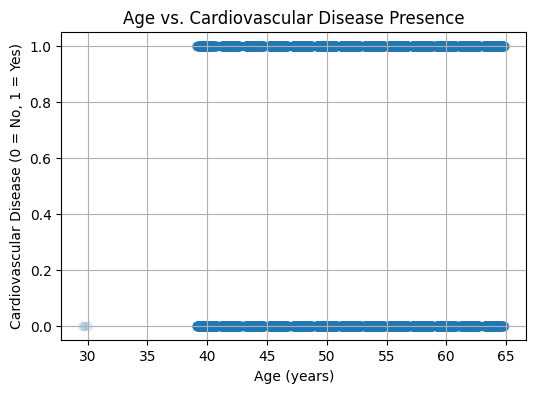

In [18]:
# Raw age data is in days so convert to years
cardio_df['age_years'] = cardio_df['age'] / 365.25

# Age vs Cardiovascular Disease Presence
plt.figure(figsize=(6, 4))
plt.scatter(cardio_df['age_years'], cardio_df['cardio'], alpha=0.1)
plt.title('Age vs. Cardiovascular Disease Presence')
plt.xlabel('Age (years)')
plt.ylabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

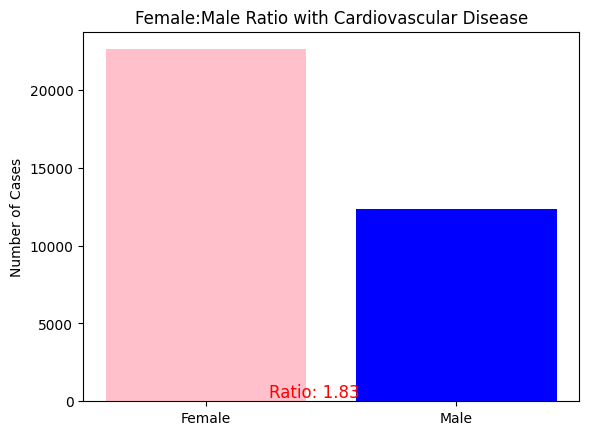

In [19]:
# Calculation for Female:Male Ratio for cardiovascular disease
cardio_gender_counts = cardio_df[cardio_df['cardio'] == 1]['gender'].value_counts()


# Number of females and males
female_count = cardio_gender_counts[0]
male_count = cardio_gender_counts[1]

# Female:Male Ratio with Cardiovascular Disease
fig, ax = plt.subplots()
ax.bar(['Female', 'Male'], [female_count, male_count], color=['pink', 'blue'])
ax.set_title('Female:Male Ratio with Cardiovascular Disease')
ax.set_ylabel('Number of Cases')

plt.text(0.25, -2,
         f'Ratio: {female_count / male_count:.2f}',
         horizontalalignment='left',
        verticalalignment='bottom', fontsize=12, color='red')
plt.show()